<h2>Proyek Analisis Data: Bike Sharing Dataset</h2>

<ul>
    <li>Nama : Fidzal</li>
    <li>Email: adrfidzal@gmail.com</li>
    
</ul>

<h3>Menentukan Pertanyaan Bisnis</h3>

<ul>
    <li>Pertanyaan 1 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan musim?</li>
    <li>Pertanyaan 2 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan musim?</li>
    <li>Pertanyaan 3 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan cuaca?</li>
    <li>Pertanyaan 4 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan cuaca?</li>
    <li>Pertanyaan 5 : Bagaimana pola penggunaan sepeda per bulannya?</li>
    <li>Pertanyaan 6 : Bagaimana pola penggunaan sepeda per jamnya?</li>
</ul>

<h3>Import Library</h3>

In [95]:
import pandas as pd
print(pd.__version__)

2.1.3


In [96]:
import numpy as np
print(np.__version__)

1.26.2


In [97]:
import matplotlib.pyplot as plt


In [98]:
import seaborn as sns
print(sns.__version__)

0.13.0


<h3>Data Wragling</h3>

<h5>Gathering Data</h5>

In [149]:
df_day = pd.read_csv('Bike-sharing-dataset/day.csv', delimiter=',')
df_hour = pd.read_csv('Bike-sharing-dataset/hour.csv', delimiter=',')

In [151]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [152]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h5> Assessing Data</h5>

Cek Tipe Data

In [153]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [154]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek Null Value

In [155]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [156]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek NaN Value

In [157]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [158]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek Duplicate Value

In [159]:
df_day.duplicated().sum()

0

In [160]:
df_hour.duplicated().sum()

0

<h5>Cleaning Data</h5>

In [161]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [162]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Delete Outlier (dengan IQR)

In [163]:
outliers = pd.DataFrame()
for kolom in df_day.columns:
    if df_day[kolom].dtype != 'O': 
        Q1 = df_day[kolom].quantile(0.25)
        Q3 = df_day[kolom].quantile(0.75)
        IQR = Q3 - Q1
        kolom_outliers = (df_day[kolom] < Q1 - 1.5 * IQR) | (df_day[kolom] > Q3 + 1.5 * IQR)
        outliers = pd.concat([outliers, df_day[kolom][kolom_outliers]])

print("Outliers pada df_day di kolom-kolom bukan objek:")
print(outliers)

Outliers pada df_day di kolom-kolom bukan objek:
          0
16      1.0
51      1.0
104     1.0
149     1.0
184     1.0
..      ...
637  2589.0
644  3031.0
658  2806.0
665  2643.0
680  2290.0

[80 rows x 1 columns]


In [164]:
outliers_indices = []
for kolom in df_day.columns:
    if df_day[kolom].dtype != 'O':  # Memeriksa apakah tipe data bukan objek
        Q1 = df_day[kolom].quantile(0.25)
        Q3 = df_day[kolom].quantile(0.75)
        IQR = Q3 - Q1
        kolom_outliers = (df_day[kolom] < Q1 - 1.5 * IQR) | (df_day[kolom] > Q3 + 1.5 * IQR)
        outliers_indices.extend(df_day[kolom][kolom_outliers].index)

df_day_cleaned = df_day.drop(outliers_indices)

print("df_day setelah menghapus outlier:")
print(df_day_cleaned)

df_day setelah menghapus outlier:
     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windsp

In [165]:
outliers = pd.DataFrame()
for kolom in df_hour.columns:
    if df_hour[kolom].dtype != 'O': 
        Q1 = df_hour[kolom].quantile(0.25)
        Q3 = df_hour[kolom].quantile(0.75)
        IQR = Q3 - Q1
        kolom_outliers = (df_hour[kolom] < Q1 - 1.5 * IQR) | (df_hour[kolom] > Q3 + 1.5 * IQR)
        outliers = pd.concat([outliers, df_hour[kolom][kolom_outliers]])

print("Outliers pada df_hour di kolom-kolom bukan objek:")
print(outliers)

Outliers pada df_hour di kolom-kolom bukan objek:
           0
372      1.0
373      1.0
374      1.0
375      1.0
376      1.0
...      ...
16885  724.0
16909  688.0
16933  679.0
17053  662.0
17077  678.0

[3244 rows x 1 columns]


In [166]:
outliers_indices = []
for kolom in df_hour.columns:
    if df_hour[kolom].dtype != 'O':  # Memeriksa apakah tipe data bukan objek
        Q1 = df_hour[kolom].quantile(0.25)
        Q3 = df_hour[kolom].quantile(0.75)
        IQR = Q3 - Q1
        kolom_outliers = (df_hour[kolom] < Q1 - 1.5 * IQR) | (df_hour[kolom] > Q3 + 1.5 * IQR)
        outliers_indices.extend(df_hour[kolom][kolom_outliers].index)

df_hour_cleaned = df_hour.drop(outliers_indices)

print("df_hour setelah menghapus outlier:")
print(df_hour_cleaned)

df_hour setelah menghapus outlier:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81   

<h3>Exploratory Data Analysis (EDA)</h3>

<h5>Explore df_day</h5>

In [167]:
df_day_cleaned.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
unique,NaN,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.366412,NaN,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,NaN,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,NaN,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,NaN,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,NaN,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000


Menggunakan Heat Map untuk Mengetahui Hubungan Antar Data

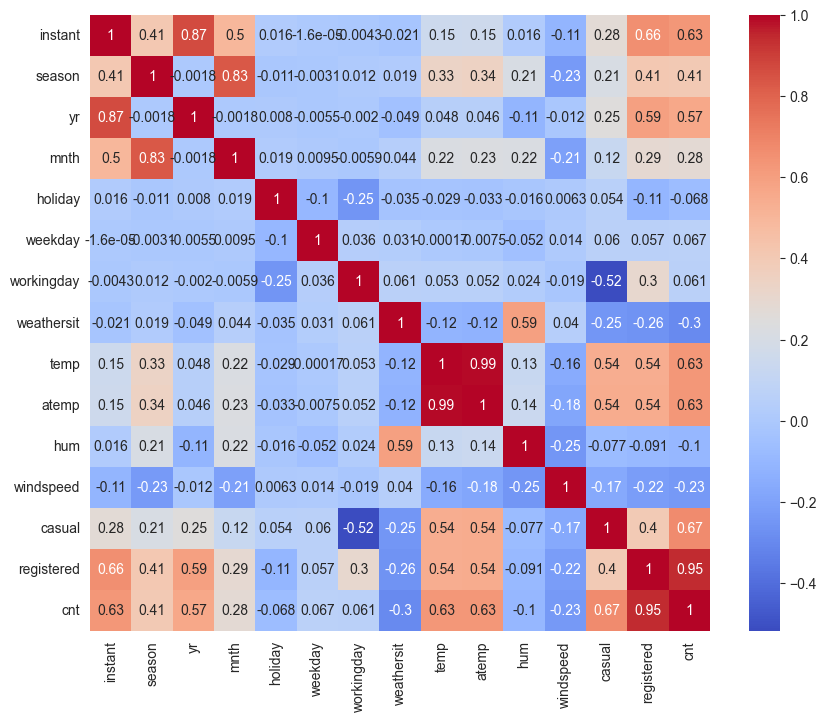

In [168]:
# Memilih kolom numerik
numeric_columns = df_day.select_dtypes(include=['float64', 'int64']).columns

corr_df_day = df_day[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_day, annot=True, cmap='coolwarm')

plt.show()

Menggunakan groupby() berdasarkan rata-rata untuk label dengan data categorical

In [169]:
print('Groupby season dengan count')

print("")

df_day.groupby('season')[['cnt']].mean().sort_values(by = 'season', ascending = True)

Groupby season dengan count



,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


In [170]:
print('Groupby holiday dengan count')

print("")

df_day.groupby('holiday')[['cnt']].mean().sort_values(by = 'holiday', ascending = True)

Groupby holiday dengan count



,cnt
holiday,
0,4527.104225
1,3735.000000


In [171]:
print('Groupby weekday dengan count')

print("")

df_day.groupby('weekday')[['cnt']].mean().sort_values(by = 'weekday', ascending = True)

Groupby weekday dengan count



,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [172]:
print('Groupby Workingday dengan count')

print("")

df_day.groupby('workingday')[['cnt']].mean().sort_values(by = 'workingday', ascending = True)

Groupby Workingday dengan count



,cnt
workingday,
0,4330.168831
1,4584.820000


In [173]:
print('Groupby weather dengan count')

print("")

df_day.groupby('weathersit')[['cnt']].mean().sort_values(by = 'weathersit', ascending = True)

Groupby weather dengan count



,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


<h5>Explore df_hour</h5>

In [174]:
df_hour_cleaned.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14799.000000,14799,14799.000000,14799.000000,14799.000000,14799.000000,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
unique,NaN,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8429.853639,NaN,2.489898,0.474965,6.511318,11.165890,0.0,3.024191,0.734847,1.444354,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,NaN,1.119989,0.499390,3.496449,7.152273,0.0,1.953634,0.441430,0.647801,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,NaN,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,NaN,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,NaN,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000


Menggunakan heat map untuk mengetahui hubungan antar data

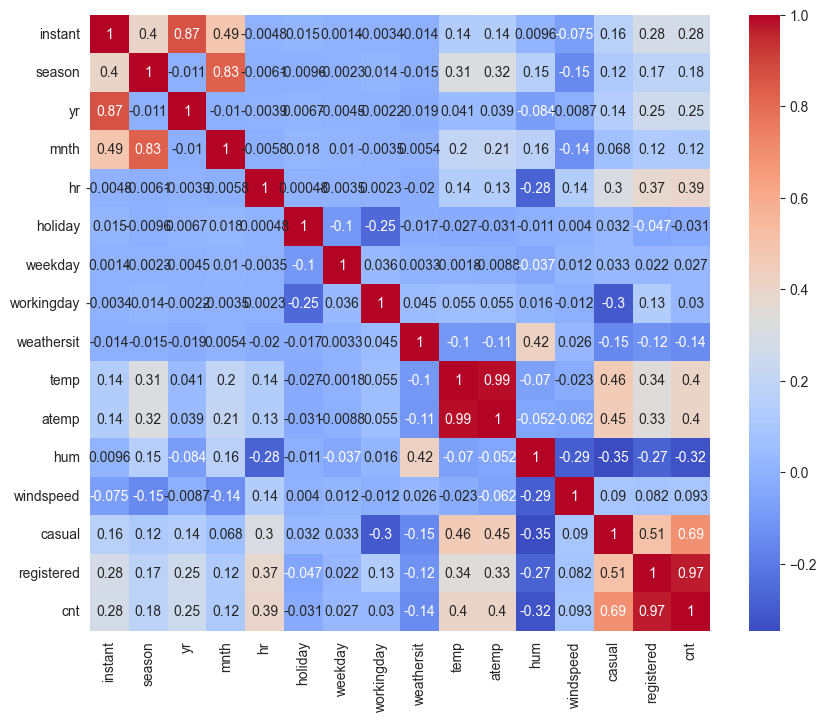

In [175]:
# Memilih kolom numerik
numeric_columns = df_hour.select_dtypes(include=['float64', 'int64']).columns

corr_df_hour = df_hour[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df_hour, annot=True, cmap='coolwarm')

plt.show()

Menggunakan groupby() berdasarkan rata-rata untuk label dengan data categorical

In [176]:
print('Groupby season dengan count')

print("")

df_hour.groupby('season')[['cnt']].mean().sort_values(by = 'season', ascending = True)

Groupby season dengan count



,cnt
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [186]:
print('Groupby hour dengan count')

print("")

df_hour.groupby('hr')[['cnt']].mean().sort_values(by = 'hr', ascending = True)

Groupby hour dengan count



,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [177]:
print('Groupby holiday dengan count')

print("")

df_hour.groupby('holiday')[['cnt']].mean().sort_values(by = 'holiday', ascending = True)

Groupby holiday dengan count



,cnt
holiday,
0,190.42858
1,156.87000


In [178]:
print('Groupby weekday dengan count')

print("")

df_hour.groupby('weekday')[['cnt']].mean().sort_values(by = 'weekday', ascending = True)

Groupby weekday dengan count



,cnt
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


In [179]:
print('Groupby Workingday dengan count')

print("")

df_hour.groupby('workingday')[['cnt']].mean().sort_values(by = 'workingday', ascending = True)

Groupby Workingday dengan count



,cnt
workingday,
0,181.405332
1,193.207754


In [180]:
print('Groupby weather dengan count')

print("")

df_hour.groupby('weathersit')[['cnt']].mean().sort_values(by = 'weathersit', ascending = True)

Groupby weather dengan count



,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


<h3>Visualization & Explanatory Analysis</h3>

<h5>Pertanyaan 1 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan musim?</h5>

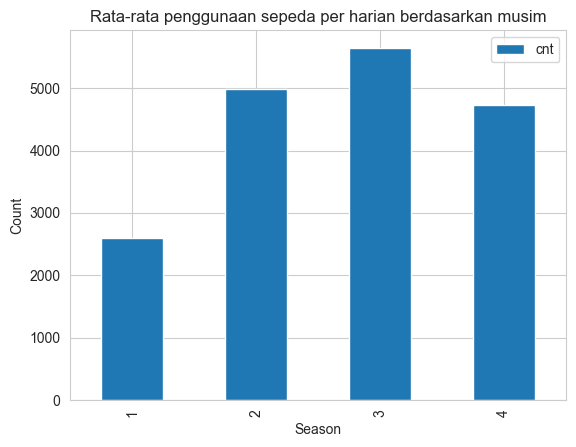

In [181]:
df_season_day = df_day.groupby('season')[['cnt']].mean().sort_values(by = 'season', ascending = True)

df_season_day.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Rata-rata penggunaan sepeda per harian berdasarkan musim')

plt.show()

Dari grafik, dapat dilihat bahwa penggunaan sepeda per harian pada musim Fall (3) paling banyak dan penggunaan sepeda pada musim Spring (1) paling sedikit

<h5> Pertanyaan 2 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan musim?</h5>

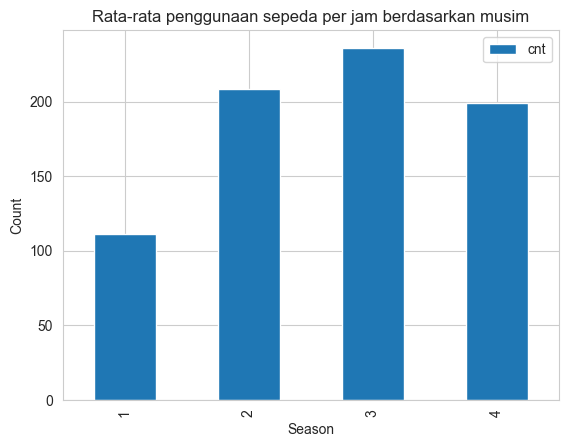

In [182]:
df_season_hour = df_hour.groupby('season')[['cnt']].mean().sort_values(by = 'season', ascending = True)

df_season_hour.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Rata-rata penggunaan sepeda per jam berdasarkan musim')

plt.show()

Sama seperti rata-rata penggunaan sepeda per harian, dapat dilihat bahwa rata-rata penggunaan sepeda per jam pada musim Fall (3) paling banyak dan rata-rata penggunaan sepeda pada musim Spring (1) paling sedikit

<h5>Pertanyaan 3 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan cuaca?</h5>

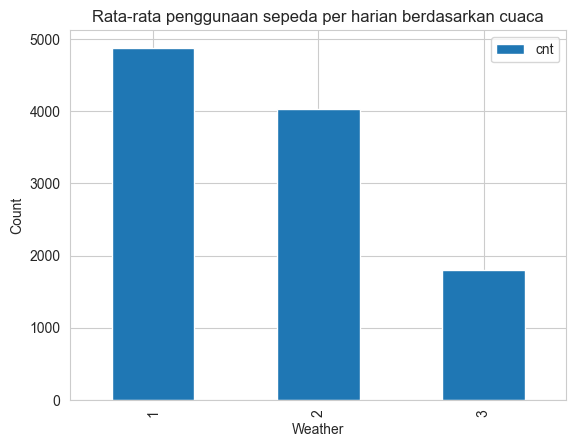

In [183]:
df_weather_day = df_day.groupby('weathersit')[['cnt']].mean().sort_values(by = 'weathersit', ascending = True)

df_weather_day.plot(kind='bar')

plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Rata-rata penggunaan sepeda per harian berdasarkan cuaca')

plt.show()

Dari grafik, dapat dilihat bahwa rata-rata penggunaan sepeda per harian pada cuaca cerah (1) paling banyak dan rata-rata penggunaan sepeda pada cuaca hujan ringan (3) paling sedikit

<h5>Pertanyaan 4 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan cuaca?</h5>

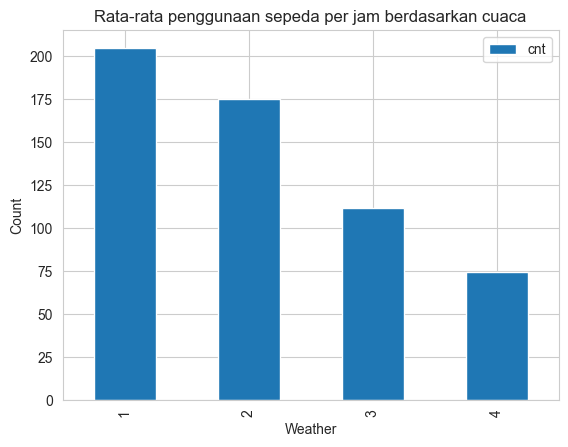

In [184]:
df_weather_hour = df_hour.groupby('weathersit')[['cnt']].mean().sort_values(by = 'weathersit', ascending = True)

df_weather_hour.plot(kind='bar')

plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Rata-rata penggunaan sepeda per jam berdasarkan cuaca')

plt.show()

Dapat dilihat bahwa rata-rata penggunaan sepeda per jam pada cuaca cerah (1) paling banyak dan rata-rata penggunaan sepeda pada cuaca hujan lebat (4) paling sedikit

<h5>Pertanyaan 5 : Bagaimana pola penggunaan sepeda per bulannya?</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_71084\2745767568.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="mnth", y="cnt", data=df_day, ci=None)


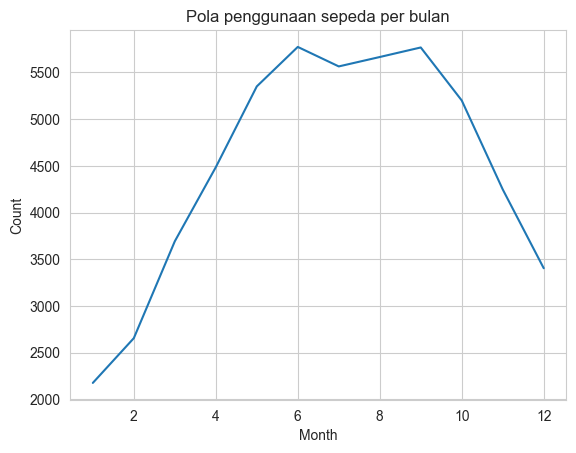

In [189]:
sns.set_style("whitegrid")
sns.lineplot(x="mnth", y="cnt", data=df_day, ci=None)
plt.title("Pola penggunaan sepeda per bulan")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

Dari grafik, kita dapat mengetahui bahwa puncak penggunaan sepeda terdapat pada bulan 6 hingga bulan 9

<h5>Pertanyaan 6 : Bagaimana pola penggunaan sepeda per jamnya?</h5>

C:\Users\user\AppData\Local\Temp\ipykernel_71084\2665806081.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=df_hour, ci=None)


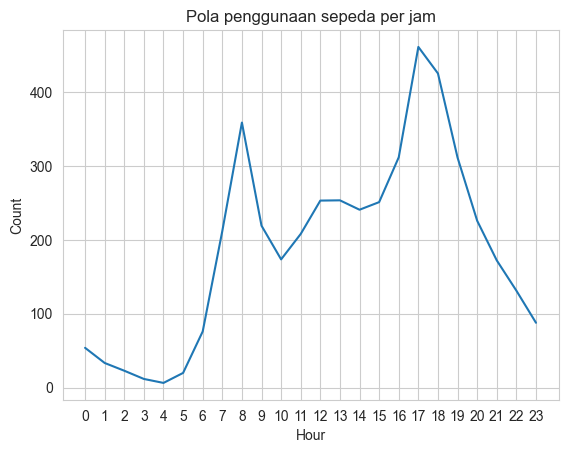

In [192]:
sns.set_style("whitegrid")
sns.lineplot(x="hr", y="cnt", data=df_hour, ci=None)
plt.title("Pola penggunaan sepeda per jam")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.xticks(range(24))
plt.show()

Dari grafik, dapat diketahui bahwa puncak penggunaan sepeda ialah pada jam 8 pagi dan pada jam 5 sore

<h3>Conclusion</h3>

<b>Pertanyaan 1 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan musim?</b>

<b>Pertanyaan 2 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan musim?</b>

Kesimpulan : Karena hasil grafik dari pertanyaan 1 dan pertanyaan 2 sama, maka kesimpulan yang dapat diambil juga sama, yaitu  rata-rata penggunaan sepeda per jam pada musim Fall (3) paling banyak dan rata-rata penggunaan sepeda pada musim Spring (1) paling sedikit

<b>Pertanyaan 3 : Bagaimana rata-rata penggunaan sepeda per harian berdasarkan cuaca?</b>

Kesimpulan : Dari grafik yang dihasilkan, dapat disimpulkan bahwa rata-rata penggunaan sepeda per harian pada cuaca cerah (1) paling banyak dan rata-rata penggunaan sepeda pada cuaca hujan ringan (3) paling sedikit

<b>Pertanyaan 4 : Bagaimana rata-rata penggunaan sepeda per jam berdasarkan cuaca?</b>

Kesimpulan : Dari grafik yang dihasilkan, dapat disimpulkan bahwa rata-rata penggunaan sepeda per jam pada cuaca cerah (1) paling banyak dan rata-rata penggunaan sepeda pada cuaca hujan lebat (4) paling sedikit

<b>Pertanyaan 5 : Bagaimana pola penggunaan sepeda per bulannya?</b>

Kesimpulan : Dari grafik yang dihasilkan, dapat disimpulkan bahwa puncak penggunaan sepeda terdapat pada bulan 6 hingga bulan 9

<b>Pertanyaan 6 : Bagaimana pola penggunaan sepeda per jamnya?</b>

Kesimpulan : Dari grafik yang dihasilkan, dapat disimpulkan bahwa puncak penggunaan sepeda ialah pada jam 8 pagi dan pada jam 5 sore